# Análisis exploratorio CONAGUA (Lluvia y temperatura)
## David Guzmán


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir("/content/drive/MyDrive")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Ejercicio 1
En la página de CONAGUA hay información de [precipitación y temperaturas mensual por estado](https://smn.conagua.gob.mx/es/climatologia/temperaturas-y-lluvias/resumenes-mensuales-de-temperaturas-y-lluvias), la información está en un pdf. El primer ejercicio será obtener un csv con cada uno de las tablas que hay en ese pdf. 


Tips
Para poder obtener un csv de una tabla de pdf, una opción es usar la biblioteca tabula

In [ ]:
pip install tabula-py

     |████████████████████████████████| 11.7MB 16.5MB/s 


In [ ]:
import tabula

Abajo está un ejemplo del link de lluvia y temperatura y el código para convertirlo en un csv

In [ ]:
  file_lluvia = "https://smn.conagua.gob.mx/tools/DATA/Climatolog%C3%ADa/Pron%C3%B3stico%20clim%C3%A1tico/Temperatura%20y%20Lluvia/PREC/2020.pdf"
  file_temperatura = "https://smn.conagua.gob.mx/tools/DATA/Climatolog%C3%ADa/Pron%C3%B3stico%20clim%C3%A1tico/Temperatura%20y%20Lluvia/TMED/2020.pdf"
  tables1 = tabula.read_pdf(file_lluvia, pages = "all", multiple_tables = True)
  tables2 = tabula.read_pdf(file_temperatura, pages = "all", multiple_tables = True)

Como verás, ```tables1``` es una lista

In [ ]:
type(tables1)

list

Si seleccionas el primer índice de la lista, obtendrás un dataframe

In [ ]:
tables1[0]

,Entidad,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic,Anual
0,Aguascalientes,38.5,28.4,1.5,4.6,17.3,72.6,162.8,77.3,81.9,4.5,0.0,8.9,498.1
1,Baja California,4.3,10.5,62.4,11.8,0.6,0.0,1.1,0.5,1.1,0.5,3.9,6.9,103.5
2,Baja California Sur,1.9,8.8,36.9,0.2,0.0,0.8,6.6,22.4,17.8,3.6,1.0,3.1,103.0
3,Campeche,31.1,13.4,4.1,25.9,207.1,499.1,137.2,184.8,234.2,293.1,99.1,50.3,1779.3
4,Coahuila,11.3,2.8,21.6,7.3,30.5,23.8,44.5,6.0,63.8,0.4,2.8,12.4,227.2
5,Colima,80.1,112.1,0.0,0.0,2.1,84.7,354.8,664.3,339.2,27.0,0.0,0.7,1665.1
6,Chiapas,28.4,46.9,21.0,32.4,239.4,409.1,182.5,345.9,373.1,251.8,199.1,38.3,2167.9
7,Chihuahua,6.0,20.2,27.3,3.3,6.2,19.5,82.8,32.4,49.1,0.1,1.5,12.4,260.8
8,Ciudad de México,11.3,5.3,8.1,21.9,32.8,59.7,103.8,107.8,97.0,20.1,1.5,0.5,469.7
9,Durango,16.9,18.7,2.3,1.0,5.6,31.1,143.9,49.9,115.1,1.9,0.3,3.6,390.4


Tu tarea será entonces guardar un csv con cada una de las tablas usando un loop para lograrlo.

Tips: Utiliza algún especie de sleeper para obtener los datos, de lo contrario, la página web te acabará bloqueando temporalmente. 

In [ ]:
import pandas as pd
import numpy as np
from time import sleep
from random import randint

Solución 1)

Descarga de bases de datos

Sólo se descargara del año 1985 a 2012 y de 2019 a 2021 por fallas en las tablas faltantes

In [ ]:
for año in range(1985, 2013):
    print(año)
    file_lluvia = "https://smn.conagua.gob.mx/tools/DATA/Climatolog%C3%ADa/Pron%C3%B3stico%20clim%C3%A1tico/Temperatura%20y%20Lluvia/PREC/"+str(año)+".pdf"
    file_temperatura = "https://smn.conagua.gob.mx/tools/DATA/Climatolog%C3%ADa/Pron%C3%B3stico%20clim%C3%A1tico/Temperatura%20y%20Lluvia/TMED/"+str(año)+".pdf"
    tables1 = tabula.read_pdf(file_lluvia, pages = "all", multiple_tables = True)
    tables2 = tabula.read_pdf(file_temperatura, pages = "all", multiple_tables = True)
    tables1[0].to_csv("/content/drive/MyDrive/Colab Notebooks/Tarea6_lluvia/"+str(año)+"_lluvia.csv")
    tables2[0].to_csv("/content/drive/MyDrive/Colab Notebooks/Tarea6_temperatura/"+str(año)+"_temp.csv")
    sleep(randint(1,6))

for año in range(2019, 2022):
    print(año)
    file_lluvia = "https://smn.conagua.gob.mx/tools/DATA/Climatolog%C3%ADa/Pron%C3%B3stico%20clim%C3%A1tico/Temperatura%20y%20Lluvia/PREC/"+str(año)+".pdf"
    file_temperatura = "https://smn.conagua.gob.mx/tools/DATA/Climatolog%C3%ADa/Pron%C3%B3stico%20clim%C3%A1tico/Temperatura%20y%20Lluvia/TMED/"+str(año)+".pdf"
    tables1 = tabula.read_pdf(file_lluvia, pages = "all", multiple_tables = True)
    tables2 = tabula.read_pdf(file_temperatura, pages = "all", multiple_tables = True)
    tables1[0].to_csv("/content/drive/MyDrive/Colab Notebooks/Tarea6_lluvia/"+str(año)+"_lluvia.csv")
    tables2[0].to_csv("/content/drive/MyDrive/Colab Notebooks/Tarea6_temperatura/"+str(año)+"_temp.csv")
    sleep(randint(1,6))

1985


Got stderr: May 13, 2021 12:12:01 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:02 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:02 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:04 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:12:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:09 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1986


Got stderr: May 13, 2021 12:12:14 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:14 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:14 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:17 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:12:19 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:19 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:19 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:22 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1987


Got stderr: May 13, 2021 12:12:27 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:27 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:27 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:30 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:12:32 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:33 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:33 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:35 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1988


Got stderr: May 13, 2021 12:12:41 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:41 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:41 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:43 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:12:46 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:46 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:46 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:48 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1989


Got stderr: May 13, 2021 12:12:55 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:55 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:55 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:12:58 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:13:01 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:01 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:01 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:03 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1990


Got stderr: May 13, 2021 12:13:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:10 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:13:12 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:12 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:12 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:14 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1991


Got stderr: May 13, 2021 12:13:20 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:20 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:20 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:23 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:13:25 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:26 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:26 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:28 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1992


Got stderr: May 13, 2021 12:13:32 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:32 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:32 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:34 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:13:37 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:37 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:37 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:40 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1993


Got stderr: May 13, 2021 12:13:48 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:48 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:48 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:51 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:13:53 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:53 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:53 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:13:56 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1994


Got stderr: May 13, 2021 12:14:05 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:05 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:05 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:14:10 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:10 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:10 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:13 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1995


Got stderr: May 13, 2021 12:14:21 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:21 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:21 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:24 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:14:26 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:26 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:26 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:29 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1996


Got stderr: May 13, 2021 12:14:33 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:33 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:33 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:36 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:14:38 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:39 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:39 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:41 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1997


Got stderr: May 13, 2021 12:14:45 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:45 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:45 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:47 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:14:50 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:50 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:50 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:52 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1998


Got stderr: May 13, 2021 12:14:58 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:58 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:14:58 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:01 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:15:03 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:03 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:03 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:06 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1999


Got stderr: May 13, 2021 12:15:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:13 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:15:16 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:16 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:16 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:18 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



2000


Got stderr: May 13, 2021 12:15:27 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:27 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:27 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:30 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:15:32 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:32 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:32 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:34 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



2001


Got stderr: May 13, 2021 12:15:39 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:39 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:39 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:42 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:15:45 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:45 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:45 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:47 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



2002


Got stderr: May 13, 2021 12:15:53 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:53 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:53 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:56 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:15:59 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:59 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:15:59 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:01 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



2003


Got stderr: May 13, 2021 12:16:09 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:09 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:09 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:12 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:16:15 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:15 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:15 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:17 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



2004


Got stderr: May 13, 2021 12:16:21 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:21 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:21 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:16:23 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:23 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:23 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:26 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



2005


Got stderr: May 13, 2021 12:16:30 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:30 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:30 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:16:33 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:33 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:33 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:35 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



2006


Got stderr: May 13, 2021 12:16:42 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:42 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:42 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:16:44 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:44 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:44 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:47 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



2007


Got stderr: May 13, 2021 12:16:51 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:52 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:52 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:16:54 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:54 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:54 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:16:57 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



2008


Got stderr: May 13, 2021 12:17:04 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:04 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:04 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:17:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:07 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:09 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



2009


Got stderr: May 13, 2021 12:17:17 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:17 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:17 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:17:20 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:20 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:20 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:22 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



2010


Got stderr: May 13, 2021 12:17:28 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:28 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:28 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:17:31 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:31 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:31 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:33 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



2011


Got stderr: May 13, 2021 12:17:39 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:39 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:39 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:17:41 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:41 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:41 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:44 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



2012


Got stderr: May 13, 2021 12:17:48 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:49 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:49 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>

Got stderr: May 13, 2021 12:17:51 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:51 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:51 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 13, 2021 12:17:53 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



2019
2020
2021


## Ejercicio 2
Limpieza de datos

Ahora hay que guardar los datos en un formato que nos permita tener toda la información en un sólo dataframe. Para poder hacer eso hay que ponerlo en un formato long con cinco columnas, la entidad federativa, el año, el mes, el valor de lluvia y el valor de precipitacion 

Tips
1. Recuerda la función ```pivot```y ```melt``` para modificar de format wide a long y viceversa
2. No todos los dataframes fueron leídos por la biblioteca tabula de modo correcta, algunos tienen la información de algunos meses metida en una sola columna. Tendrás que limpiar eso para que quede bien estructurado el dataframe. La función ```split``` que separa strings podría ser útil.

El código de abajo muestra un ejemplo de cómo no se leyó correctamente la tabla y varios meses están ratos, además, el primer valor es el de las columnas.



In [ ]:
file_lluvia = "https://smn.conagua.gob.mx/tools/DATA/Climatolog%C3%ADa/Pron%C3%B3stico%20clim%C3%A1tico/Temperatura%20y%20Lluvia/PREC/1991.pdf"
tables1 = tabula.read_pdf(file_lluvia, pages = "all", multiple_tables = True)
tables1[0].head()

Got stderr: May 17, 2021 2:24:59 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider loadDiskCache
May 17, 2021 2:24:59 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
May 17, 2021 2:24:59 AM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
May 17, 2021 2:24:59 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 17, 2021 2:24:59 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 17, 2021 2:24:59 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
May 17, 2021 2:25:02 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



,1991,Unnamed: 0,Unnamed: 1,PRECIPITACIÓN A NIVEL NACIONAL Y POR ENTIDAD FEDERATIVA,Unnamed: 2
0,ENTIDAD,ENE,FEB,MAR ABR MAY JUN JUL AGO SEP OCT NOV DIC,ANUAL
1,AGUASCALIENTES,0.0,19.6,0.0 0.0 3.7 72.0 348.9 90.7 51.9 39.3 0.0 23.1,649.3
2,BAJA CALIFORNIA,7.3,23.7,40.9 0.0 0.0 0.0 0.0 0.0 2.7 1.1 3.6 14.4,93.8
3,BAJA CALIFORNIA SUR,9.3,14.7,2.8 0.0 0.0 0.0 0.0 1.4 10.7 2.6 3.4 3.8,48.8
4,CAMPECHE,50.5,71.9,5.2 5.7 84.1 115.1 184.9 210.7 211.0 124.2 77....,"1,285.4"


Solución 2)

Limpieza de los CSV de temperatura

Los csv de temperatura vienen con diferentes formatos de errores en la lectura, los cuales son compartidos de la siguiente manera:

1985 a 2011, 2012, 2019 a 2021

por lo que cada bloque se le hara su respectiva limpieza


In [ ]:
# 1985 a 2011
df_temp_final = pd.DataFrame()

for año in range(1985,2012):
    df_temp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tarea6_temperatura/"+str(año)+"_temp.csv", header=1)
    df_temp_sep = df_temp['FEB MAR ABR MAY JUN JUL AGO SEP OCT NOV DIC ANUAL'].str.split(expand=True)
    df_temp_sep.columns = ["FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC", "ANUAL"]
    df_temp.drop(['0', 'FEB MAR ABR MAY JUN JUL AGO SEP OCT NOV DIC ANUAL'], axis=1, inplace=True)
    df_temp = pd.concat([df_temp, df_temp_sep], axis=1)
    df_temp["AÑO"] = año
    df_temp["ENTIDAD"] = df_temp["ENTIDAD"].str.title()
    df_temp.columns = df_temp.columns.str.title()
    df_temp = pd.melt(df_temp, id_vars=["Entidad", "Año"], var_name="Mes", value_name="Temp")
    df_temp_final = pd.concat([df_temp_final, df_temp])
    #print(df_temp)

# 2012
año = 2012
df_temp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tarea6_temperatura/"+str(año)+"_temp.csv", header=1)
df_temp_sep = df_temp['FEB MAR ABR MAY JUN JUL AGO SEP OCT NOV DIC'].str.split(expand=True)
df_temp_sep.columns = ["FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC"]
df_temp.drop(['0', 'FEB MAR ABR MAY JUN JUL AGO SEP OCT NOV DIC'], axis=1, inplace=True)
df_temp = pd.concat([df_temp, df_temp_sep], axis=1)
df_temp["AÑO"] = año
df_temp = df_temp.reindex(columns=["ENTIDAD", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC", "ANUAL", "AÑO"])
df_temp["ENTIDAD"] = df_temp["ENTIDAD"].str.title()
df_temp.columns = df_temp.columns.str.title()
df_temp = pd.melt(df_temp, id_vars=["Entidad", "Año"], var_name="Mes", value_name="Temp")
df_temp_final = pd.concat([df_temp_final, df_temp])
#print(df_temp)

# 2019 a 2021
for año in range(2019,2022):
    df_temp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tarea6_temperatura/"+str(año)+"_temp.csv", header=0)
    df_temp.drop(['Unnamed: 0'], axis=1, inplace=True)
    df_temp["Año"] = año
    df_temp = pd.melt(df_temp, id_vars=["Entidad", "Año"], var_name="Mes", value_name="Temp")
    df_temp_final = pd.concat([df_temp_final, df_temp])
    #print(df_temp)

df_temp_final.index = range(len(df_temp_final))


Limpieza de los CSV de Lluvia

Los csv de lluvia vienen con diferentes formatos de errores de lectura, los cuales son compartidos de la siguiente manera:

1985 a 2003, 2004 a 2012, 2019 a 2021

por lo que cada bloque se le hara su respectiva limpieza

In [ ]:
# 1985 a 2003
df_lluvia_final = pd.DataFrame()

for año in range(1985, 2004):
    df_lluvia = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tarea6_lluvia/"+str(año)+"_lluvia.csv", header=1)
    df_lluvia_sep = df_lluvia['MAR ABR MAY JUN JUL AGO SEP OCT NOV DIC'].str.split(expand=True)
    df_lluvia_sep.columns = ["MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC"]
    df_lluvia.drop(["0", "MAR ABR MAY JUN JUL AGO SEP OCT NOV DIC"], axis=1, inplace=True)
    df_lluvia = pd.concat([df_lluvia, df_lluvia_sep], axis=1)
    df_lluvia = df_lluvia.reindex(columns=["ENTIDAD", "ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC", "ANUAL"])
    df_lluvia["AÑO"] = año
    df_lluvia["ENTIDAD"] = df_lluvia["ENTIDAD"].str.title()
    df_lluvia.columns = df_lluvia.columns.str.title()
    df_lluvia = pd.melt(df_lluvia, id_vars=["Entidad", "Año"], var_name="Mes", value_name="Lluvia")
    df_lluvia_final = pd.concat([df_lluvia_final, df_lluvia])
    #print(df_lluvia)

# 2004 a 2012
for año in range(2004, 2013):
    df_lluvia = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tarea6_lluvia/"+str(año)+"_lluvia.csv", header=2)
    df_lluvia.drop(["0"], axis=1, inplace=True)
    df_lluvia["año"] = año
    df_lluvia["ENTIDAD"] = df_lluvia["ENTIDAD"].str.title()
    df_lluvia.columns = df_lluvia.columns.str.title()
    df_lluvia = pd.melt(df_lluvia, id_vars=["Entidad", "Año"], var_name="Mes", value_name="Lluvia")
    df_lluvia_final = pd.concat([df_lluvia_final, df_lluvia])
    #print(df_lluvia)

# 2019 a 2021
for año in range(2019, 2022):
    df_lluvia = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tarea6_lluvia/"+str(año)+"_lluvia.csv", header=0)
    df_lluvia.drop(["Unnamed: 0"], axis=1, inplace=True)
    df_lluvia["Año"] = año
    df_lluvia = pd.melt(df_lluvia, id_vars=["Entidad", "Año"], var_name="Mes", value_name="Lluvia")
    df_lluvia_final = pd.concat([df_lluvia_final, df_lluvia])
    #print(df_lluvia)

df_lluvia_final.index = range(len(df_lluvia_final))

In [ ]:
# Unimos los datos en una sola dataframe
df = pd.merge(df_temp_final, df_lluvia_final)

In [ ]:
# Finalmente vamos a corregir: 

# "Distrito federal" por "Ciudad de México" y "Estado De México" por "Estado de México".
df.Entidad.replace({"Distrito Federal":"Ciudad de México", "Estado De México":"Estado de México"}, inplace=True)

# Quitado comas de los datos que deberían ser números para después convertirlos ahorasi a números
df[["Temp", "Lluvia"]] = df[["Temp", "Lluvia"]].replace({",":""}, regex=True)

df["Temp"] = pd.to_numeric(df["Temp"])
df["Lluvia"] = pd.to_numeric(df["Lluvia"])


In [ ]:
df

,Entidad,Año,Mes,Temp,Lluvia
0,Aguascalientes,1985,Ene,12.0,4.9
1,Baja California,1985,Ene,11.1,12.2
2,Baja California Sur,1985,Ene,15.7,30.3
3,Campeche,1985,Ene,22.9,20.9
4,Coahuila,1985,Ene,8.4,40.7
...,...,...,...,...,...
13294,Tlaxcala,2021,Anual,NaN,NaN
13295,Veracruz,2021,Anual,NaN,NaN
13296,Yucatán,2021,Anual,NaN,NaN
13297,Zacatecas,2021,Anual,NaN,NaN


In [ ]:
# Para trabajar en los siguientes ejercicios haremos una nueva dataframe DF en donde se eliminan los apartados de "Anual" en columna "Mes" 
# y "Nacional" en columna "Entidad"
indices_a_borrar = df[(df.Mes=="Anual") | (df.Entidad=="Nacional") ].index
DF = df.drop(indices_a_borrar)

## Ejercicio 3

Ya que tienes las tablas listas realiza un análisis exploratorio, deberías responder las siguientes preguntas 

1. ¿Cuáles son los estados con más lluvia acumulada histórica?
2. ¿Cuál es el promedio y desv. std. de lluvia y temperatura por estado y mes? Tip, puedes generar columnas extra en tu DF donde guardar esta info.
3. ¿Cuántas veces un estado tuvo periodos de temperatura anomalemente alta y baja? ¿Cuántas veces un estado tuvo periodos de lluvia anomalemente alta y baja? Tendrás que ver cómo defines anomalamente 
4. ¿Cuál es el mes con más lluvia, y el de mayor temperatura?
5. ¿Cuál es la tendencia histórica de temperatura y lluvia por estado? La idea aquí sería clasificar a un estado con tendencia estable, decreciente y creciente tanto por temperatura como por lluvia. 

Solición 3.1)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

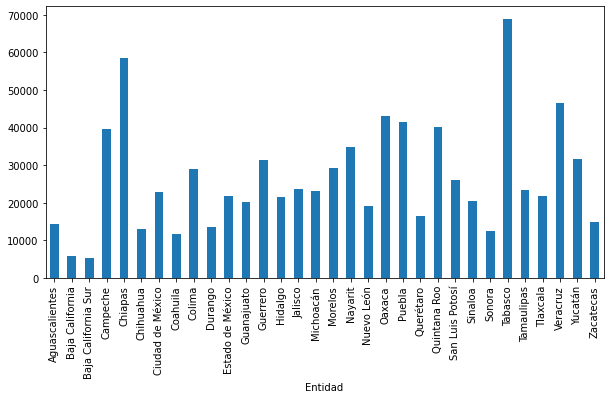

In [ ]:
DF.groupby(by="Entidad")["Lluvia"].sum().plot(kind="bar", figsize=(10,5))

Note que donde mas ha llovido es en Tabasco, Chiapas, Campeche y Veracruz

Solución 3.2)

In [ ]:
DF_mean = DF.groupby(by=["Entidad", "Mes"])["Temp", "Lluvia"].mean().rename(columns={"Temp":"Temp mean", "Lluvia":"Lluvia mean"})
DF_std = DF.groupby(by=["Entidad", "Mes"])["Temp", "Lluvia"].std().rename(columns={"Temp":"Temp std", "Lluvia":"Lluvia std"})
DF_mean_std = pd.concat([DF_mean, DF_std], axis=1)
DF_mean_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Temp mean  Lluvia mean  Temp std  Lluvia std
Entidad        Mes                                              
Aguascalientes Abr  19.016129     5.419355  1.106374    6.998972
               Ago  19.730000   104.190000  0.711555   53.911622
               Dic  13.273333     5.873333  0.888600    6.992702
               Ene  12.729032    13.209677  0.666430   25.366715
               Feb  14.409677    12.593548  1.066257   23.281107
...                       ...          ...       ...         ...
Zacatecas      Mar  16.006452     3.548387  1.220911    6.679914
               May  20.823333    16.476667  0.973328   11.667541
               Nov  14.683333    10.550000  0.989630   12.554674
               Oct  17.260000    29.830000  0.683601   21.267040
               Sep  18.940000    86.700000  0.504189   31.743281

[384 rows x 4 columns]

Solución 3.3)

Definimos "Anormal" si el dato llega estar fuera del intervalo *(mean - 2*std, mean + 2*std)*

In [ ]:
# Creamos una nueva dataframe llamada "base" en donde se guardará todo lo que se ocupe (medias, desviaciones y limites inferiores y superiores)
base = DF_mean_std
base["Temp lim inf"] = base["Temp mean"] - 2*base["Temp std"]
base["Temp lim sup"] = base["Temp mean"] + 2*base["Temp std"]
base["Lluvia lim inf"] = base["Lluvia mean"] - 2*base["Lluvia std"]
base["Lluvia lim sup"] = base["Lluvia mean"] + 2*base["Lluvia std"]

# Unimos a "base" con "DF" para facilitar el analisis
base = pd.merge(DF, base, on = ["Entidad", "Mes"], how="outer")

# Agregamos columnas booleanas que indican si el dato de Temp/Lluvia es atipico
base["Veces Temp anormal inf"] = base["Temp"]<base["Temp lim inf"]
base["Veces Temp anormal sup"] = base["Temp"]>base["Temp lim sup"]
base["Veces Lluvia anormal inf"] = base["Lluvia"]<base["Lluvia lim inf"] 
base["Veces Lluvia anormal sup"] = base["Lluvia"]>base["Lluvia lim sup"]

base.head()

,Entidad,Año,Mes,Temp,Lluvia,Temp mean,Lluvia mean,Temp std,Lluvia std,Temp lim inf,Temp lim sup,Lluvia lim inf,Lluvia lim sup,Veces Temp anormal inf,Veces Temp anormal sup,Veces Lluvia anormal inf,Veces Lluvia anormal sup
0,Aguascalientes,1985,Ene,12.0,4.9,12.729032,13.209677,0.66643,25.366715,11.396172,14.061892,-37.523753,63.943108,False,False,False,False
1,Aguascalientes,1986,Ene,12.4,0.1,12.729032,13.209677,0.66643,25.366715,11.396172,14.061892,-37.523753,63.943108,False,False,False,False
2,Aguascalientes,1987,Ene,11.7,23.9,12.729032,13.209677,0.66643,25.366715,11.396172,14.061892,-37.523753,63.943108,False,False,False,False
3,Aguascalientes,1988,Ene,12.1,0.0,12.729032,13.209677,0.66643,25.366715,11.396172,14.061892,-37.523753,63.943108,False,False,False,False
4,Aguascalientes,1989,Ene,14.1,0.0,12.729032,13.209677,0.66643,25.366715,11.396172,14.061892,-37.523753,63.943108,False,True,False,False


Número de veces que ocurrio temperatura anormal por estado

In [ ]:
base.groupby(by=["Entidad"])["Veces Temp anormal inf", "Veces Temp anormal sup"].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Veces Temp anormal inf,Veces Temp anormal sup
Entidad,,
Aguascalientes,9,9
Baja California,6,5
Baja California Sur,5,8
Campeche,6,12
Chiapas,4,21
Chihuahua,5,6
Ciudad de México,3,13
Coahuila,7,8
Colima,3,11


Número de veces que ocurrio lluvia anormal por estado

In [ ]:
base.groupby(by=["Entidad"])["Veces Lluvia anormal inf", "Veces Lluvia anormal sup"].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Veces Lluvia anormal inf,Veces Lluvia anormal sup
Entidad,,
Aguascalientes,0,16
Baja California,0,19
Baja California Sur,0,16
Campeche,1,18
Chiapas,2,14
Chihuahua,1,22
Ciudad de México,0,16
Coahuila,0,22
Colima,0,19


Solución 3.4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



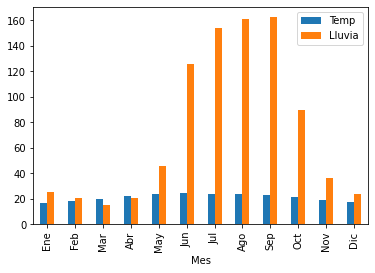

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Temp       24.225208
Lluvia    162.327500
dtype: float64

In [ ]:
meses_ordenados = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
DF.groupby(by="Mes")["Temp", "Lluvia"].mean().reindex(meses_ordenados).plot(kind="bar")
plt.show()
DF.groupby(by="Mes")["Temp", "Lluvia"].mean().reindex(meses_ordenados).max()

Temp: Jun   
Lluvia: Sep 

Solución 3.5)

Definimos que

 un estado es decreciente si (b-a) < -sigma 

 un estado es estable si |b-a| < sigma 

 un estado es creciente si (b-a) > sigma  

 dónde:

 a = valor de la lluvia/temperatura en el año 1985

 b = valor de la lluvia/temperatura en el año 2020

 sigma = desviación estándar en la info de 1985 a 2020

Como extra, haremos una gráfica de las tendencias. Para que las graficas de las tendencias no salgan mal (feas), quitamos de la base los registros del año 2021, pues solo hay registros del primer cuatrimestre del año, y a esta nueva base la llamamos "tendencia"

In [ ]:
tendencia = DF.drop(DF[DF.Año==2021].index).groupby(by=["Entidad", "Año"])["Temp", "Lluvia"].mean()

# Extraemos los estados en un solo vector
estados = tendencia.index.get_level_values(0).unique()

# Inicializamos las dataframes que ocuparemos para clasificar 
bajista_temp = pd.DataFrame(columns=["Temp decreciente"])
estable_temp = pd.DataFrame(columns=["Temp estable"])
alcista_temp = pd.DataFrame(columns=["Temp creciente"])
bajista_lluvia = pd.DataFrame(columns=["Lluvia decreciente"])
estable_lluvia = pd.DataFrame(columns=["Lluvia estable"])
alcista_lluvia = pd.DataFrame(columns=["Lluvia creciente"])

for estado in estados:
    # Desviaciones
    sigma_temp = tendencia.loc[estado].std().Temp
    sigma_lluvia = tendencia.loc[estado].std().Lluvia
    
    # Temperatura/Lluvia en los años 1985 y 2020
    a_temp = tendencia.loc[estado].loc[1985].Temp
    b_temp = tendencia.loc[estado].loc[2020].Temp
    a_lluvia = tendencia.loc[estado].loc[1985].Lluvia
    b_lluvia = tendencia.loc[estado].loc[2020].Lluvia
    
    # Diferencias
    diferencia_temp = b_temp - a_temp
    diferencia_lluvia = b_lluvia - a_lluvia

    # Clasificaciones
    if diferencia_temp > sigma_temp:
        alcista_temp = alcista_temp.append({"Temp creciente":estado}, ignore_index=True)
    elif diferencia_temp < - sigma_temp:
        bajista_temp = bajista_temp.append({"Temp decreciente":estado}, ignore_index=True)
    elif - sigma_temp <= diferencia_temp <= sigma_temp:
        estable_temp = estable_temp.append({"Temp estable":estado}, ignore_index=True)

    if diferencia_lluvia > sigma_lluvia:
        alcista_lluvia = alcista_lluvia.append({"Lluvia creciente":estado}, ignore_index=True)
    elif diferencia_lluvia < - sigma_lluvia:
        bajista_lluvia = bajista_lluvia.append({"Lluvia decreciente":estado}, ignore_index=True)
    elif - sigma_lluvia <= diferencia_lluvia <= sigma_lluvia:
        estable_lluvia = estable_lluvia.append({"Lluvia estable":estado}, ignore_index=True)

estados_tendencia = pd.concat([bajista_temp, estable_temp, alcista_temp, bajista_lluvia, estable_lluvia, alcista_lluvia], axis=1).reset_index(drop=True)
estados_tendencia
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Temp decreciente,Temp estable,Temp creciente,Lluvia decreciente,Lluvia estable,Lluvia creciente
0,NaN,Michoacán,Aguascalientes,Chihuahua,Aguascalientes,Campeche
1,NaN,NaN,Baja California,Ciudad de México,Baja California,Colima
2,NaN,NaN,Baja California Sur,Coahuila,Baja California Sur,Morelos
3,NaN,NaN,Campeche,Hidalgo,Chiapas,Quintana Roo
4,NaN,NaN,Chiapas,Querétaro,Durango,Tabasco
5,NaN,NaN,Chihuahua,San Luis Potosí,Estado de México,Veracruz
6,NaN,NaN,Ciudad de México,Tamaulipas,Guanajuato,Yucatán
7,NaN,NaN,Coahuila,Tlaxcala,Guerrero,NaN
8,NaN,NaN,Colima,NaN,Jalisco,NaN
9,NaN,NaN,Durango,NaN,Michoacán,NaN


Gráficas

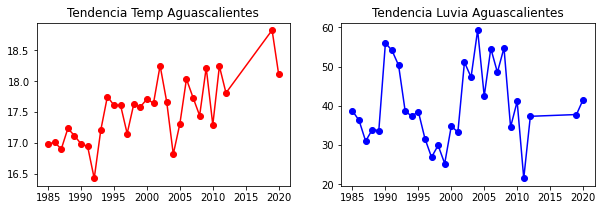

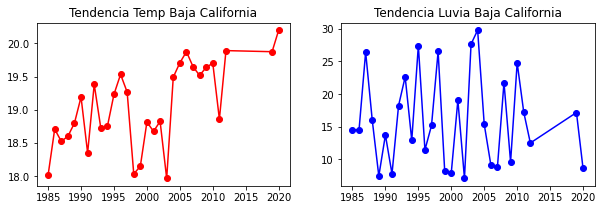

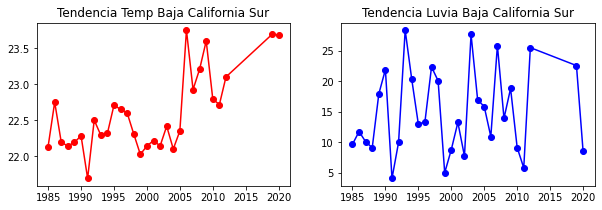

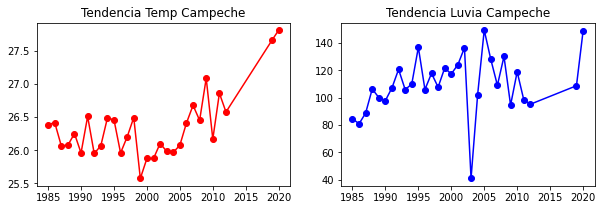

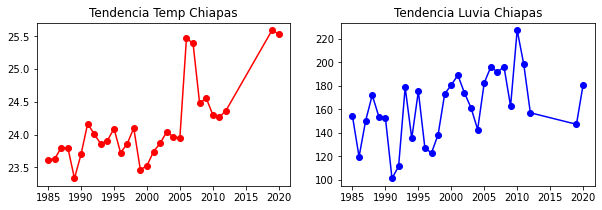

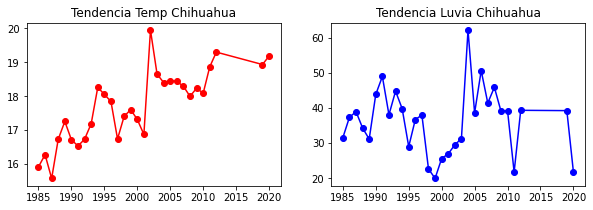

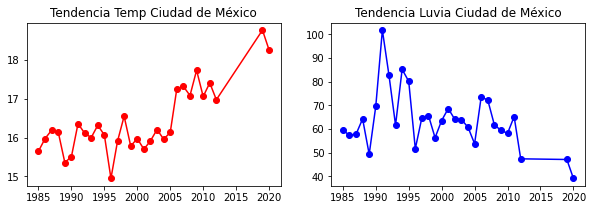

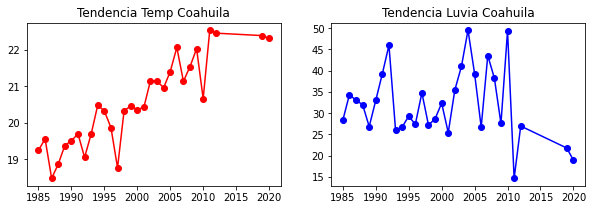

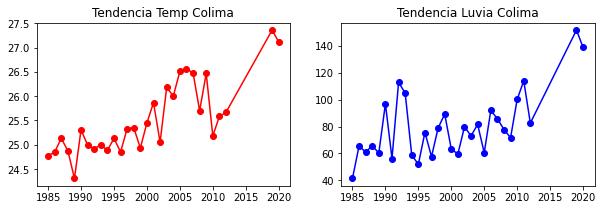

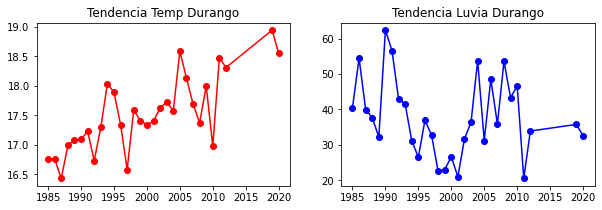

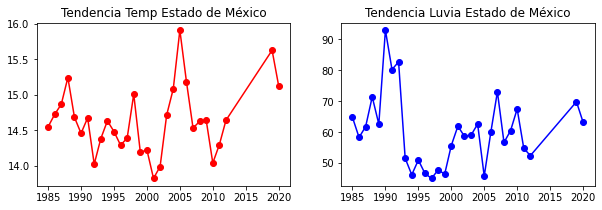

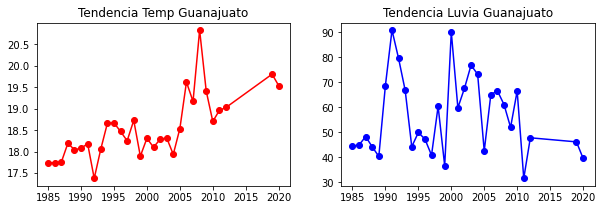

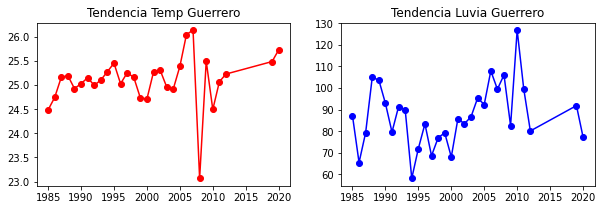

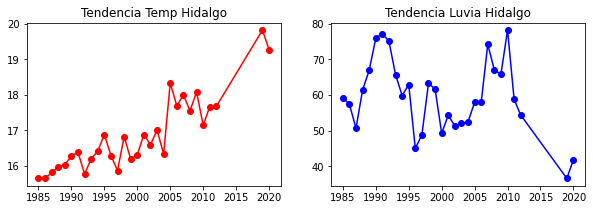

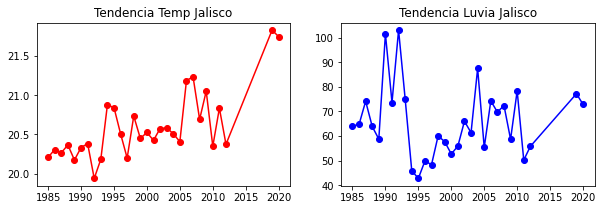

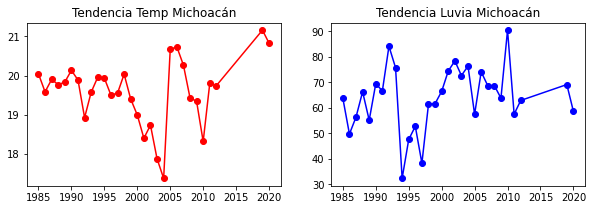

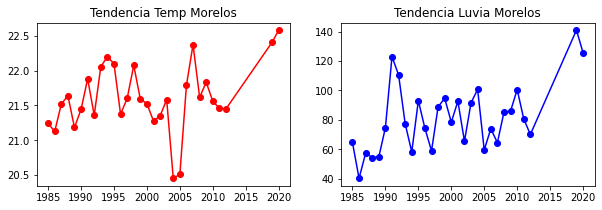

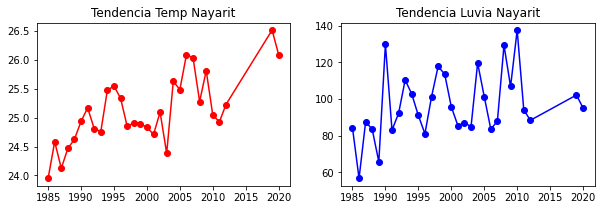

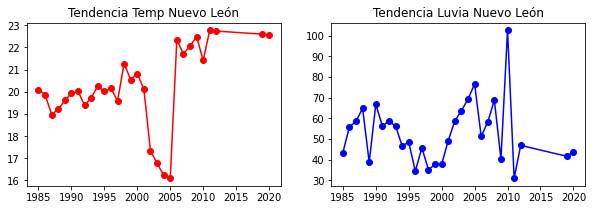

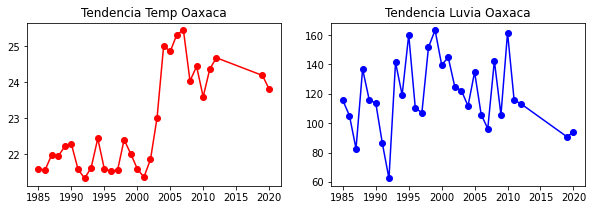

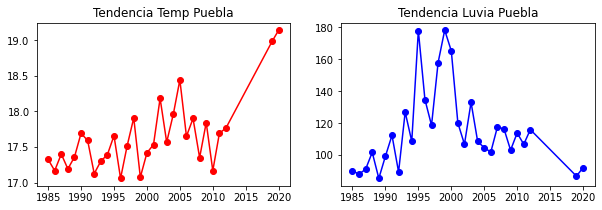

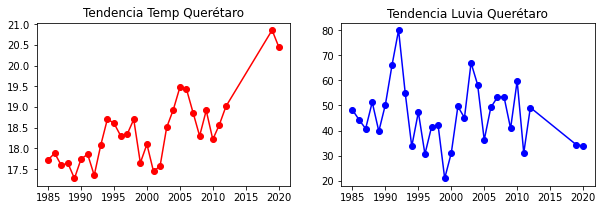

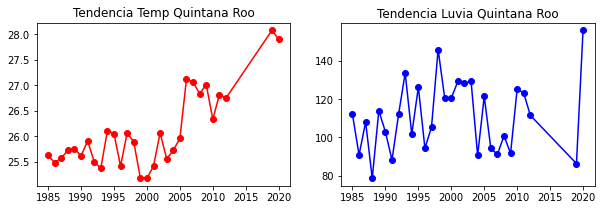

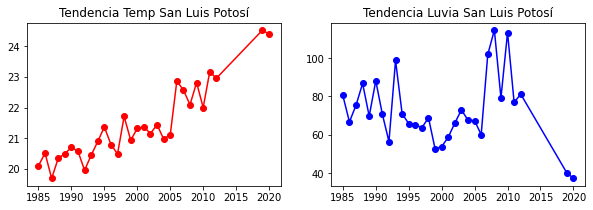

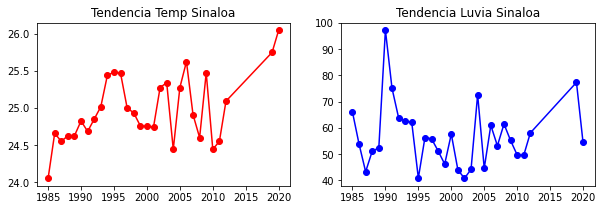

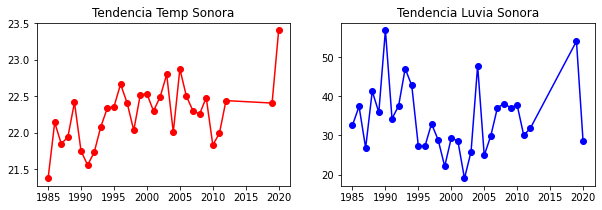

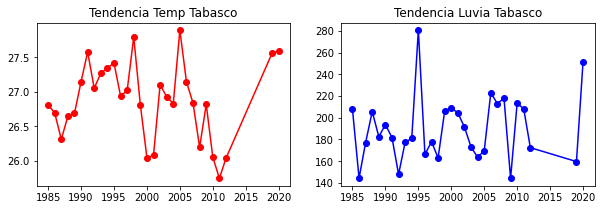

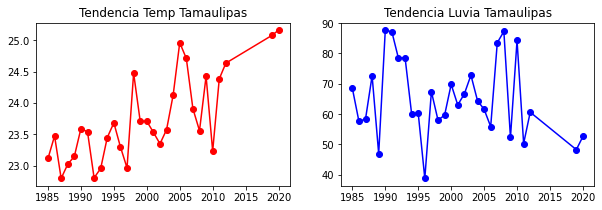

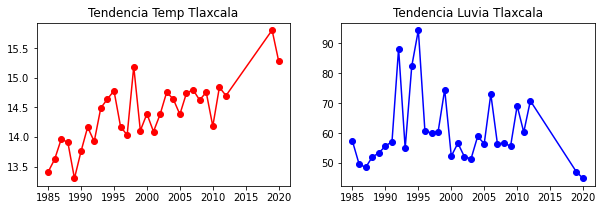

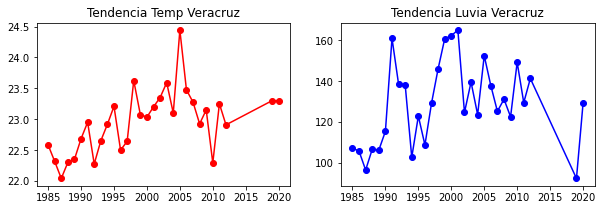

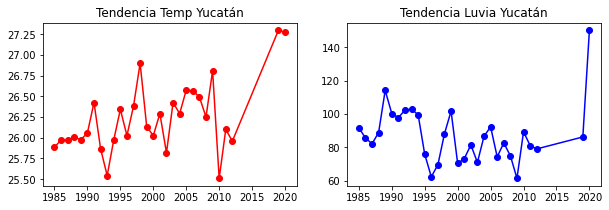

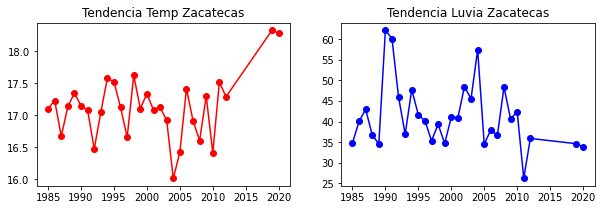

In [ ]:
for estado in estados:
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)   
    plt.plot(tendencia.loc[estado].Temp, "ro-")
    plt.title("Tendencia Temp "+estado)
    plt.subplot(1,2,2)   
    plt.plot(tendencia.loc[estado].Lluvia, "bo-")
    plt.title("Tendencia Luvia "+estado)
    plt.show()

## Ejercicio 4
1. Haz una gráfica de boxplot con la información de lluvia por mes. ¿Algo interesante que notes?
2. Haz una gráfica de dispersión donde compares temperatura vs lluvia
3. Haz una gráfica de línea donde muestres la evolución de la lluvia y la temperatura por mes, ¿alguna estacionalidad que notes? Tip, tal vez quieras usar un doble eje vertical para que esta gráfica se pueda ver bien
4. Haz una gráfica de línea donde muestres la evolución de la temperatura por año y mes, ¿alguna estacionalidad y tendencia que notes?
5. Haz una gráfica donde muestres el diferencial de lluvia para el primer trimestre de 2021 vs el promedio historico. Ordena los estados de mayor a menor diferencial. 

Solución 4.1)

In [ ]:
import plotly.express as px

In [ ]:
px.box(DF, x="Mes", y="Lluvia", notched=True)

Note que los meses de junio, julio, agosto y septiembre fue donde más llovío. también estos fuerón los meses en donde mas hubo dispersión en la distribución. 
Adicionalmente en todos los meses hubierón lluvias atípicas.
Finalmente podemos ver que la distribución de la lluvia seguramente no es normal, pues en todos los meses se presentea sesgo (asimetría hacia la derecha),

Solución 4.2)

In [ ]:
px.scatter(DF, x=DF.Temp, y=DF.Lluvia, color=DF.Mes)

Solución 4.3)

Para este y el siguiente inciso del ejercicio cuatro, ocuparemos los datos de la sección "Nacional" que se encuentran en df

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df_mes = df[df.Entidad=="Nacional"]

# Eliminamos los apartados de "Anual" pues no nos sirven y sacamos las media de temperatura y lluvia agrupando por mes, para ver la evolución por mes
df_mes = df_mes.drop(df_mes[df_mes.Mes=="Anual"].index).groupby("Mes")["Temp", "Lluvia"].mean().reindex(meses_ordenados)

In [ ]:
# Creamos figura con eje-y secundario
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Agregamos trazos
fig.add_trace(go.Line(x=df_mes.index, y=df_mes.Lluvia, name="Lluvia data"),secondary_y=False)
fig.add_trace(go.Line(x=df_mes.index, y=df_mes.Temp, name="Temp data"), secondary_y=True)

# Titulo de la figura 
fig.update_layout(title_text="Lluvia y Temp en Doble Eje Y")

# Titulo en eje-x
fig.update_xaxes(title_text="Meses")

# Titulo en eje-y
fig.update_yaxes(title_text="<b>Lluvia mm</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Temp °C</b>", secondary_y=True)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




En la gráfica se ve lo esperado, esto es que llueve más en los meses de junio a septiembre y esto ocurre justo un poco después de que las altas temperaturas han comenzado, es decir, la gráfica de la lluvia esta un poco desplazada a la derecha respecto a la de la temperatura. Tanto la lluvia como la temperatura comienzan de menos, luego suben y poco antes del final del año vuelven a bajar.

Solución 4.4)

In [ ]:
df_nacional_temp = df[df.Entidad=="Nacional"]

# Eliminamos los datos "Anual" pues no nos sirven
df_nacional_temp = df_nacional_temp.drop(df_nacional_temp[df_nacional_temp.Mes=="Anual"].index)
# Agregamos una nueva columna llamada "Fecha", en donde concatenaremos el valor de año y mes 
df_nacional_temp["Fecha"] = df_nacional_temp.Año.map(str)+" "+df_nacional_temp.Mes.map(str)
# Eliminamos columnas que no necesitamos, asi como NaN y volvemos la Fecha el indice
df_nacional_temp = df_nacional_temp.drop(["Año", "Mes", "Entidad"], axis=1).set_index("Fecha").dropna()

plot = px.line(df_nacional_temp, x=df_nacional_temp.index, y=df_nacional_temp.Temp)
plot.update_xaxes(title_text="Fecha")
plot.show()

Se observa una estacionalidad por año como se esperaba, lo interesante en el gráfico es que a partir del año 2007 se puede ver una mayor variabilidad en la serie, alcanzando temperaturas mas extremistas. Además se observa una muy pequeña tendencia alcista

Solución 4.5)

Ocuparemos DF que es en donde no viene ni la sección de "Anual" ni "Nacional"

In [ ]:
trimestre = ["Ene", "Feb", "Mar"]
df_trimestre = DF[DF.Mes.isin(trimestre)] # Seleccionamos solo los meses de enero, febreo y marzo
df_2021 = df_trimestre.query("Año==2021") # solo nos fijamos en el año 2021
df_trimestre = pd.DataFrame(df_trimestre.groupby("Entidad")["Lluvia"].mean()) # agrupamos por entidad y sacamos promedio en lluvia de 1985 a 2021 (ya esta en trimestres)
df_2021 = pd.DataFrame(df_2021.groupby("Entidad")["Lluvia"].mean()) # agrupamos por entidad y sacamos promedio para el 2021
# Armamos el diferencial sorteado y lo ploteamos
diferencial = pd.DataFrame(abs(df_trimestre.Lluvia - df_2021.Lluvia).sort_values(ascending=False))
plot = px.bar(diferencial, x=diferencial.index, y=diferencial.Lluvia)
plot.update_xaxes(title_text="Entidades")
plot.update_yaxes(title_text="<b>Lluvia mm</b> Diferencial")
plot.show()


## Ejercicio 5
En un diccionario, guarda la siguiente información.

Haz una llave para cada estado, dentro de esa llave haz un diccionario anidado con:

1. El dataframe de lluvia para ese estado
2. El dataframe de temperatura para ese estado
3. La tendencia historica de ese estado
4. El número de veces que ha habido lluvia y temperatura anomalemente bajas y altas
5. El diferencia de lluvia del primer trimestre 2021 vs el historico

In [ ]:
dicc = {}
DF.Entidad.unique()
for estado in DF.Entidad.unique():
    k1 = base[base["Entidad"]==estado].loc[:,["Veces Lluvia anormal inf", "Veces Lluvia anormal sup"]].sum()
    k2 = base[base["Entidad"]==estado].loc[:,["Veces Temp anormal inf", "Veces Temp anormal sup"]].sum()
    j1 = estados_tendencia[estados_tendencia==estado].dropna(axis=1, how="all").columns[0]
    j2 = estados_tendencia[estados_tendencia==estado].dropna(axis=1, how="all").columns[1]
    delta = diferencial.loc[estado]
    dicc[estado] = {"df_lluvia":DF[DF["Entidad"]==estado].drop("Temp", axis=1).reset_index(drop=True), # dataframe de lluvia
                    "df_temp":DF[DF["Entidad"]==estado].drop("Lluvia", axis=1).reset_index(drop=True), # dataframe de temperatura
                    "trend":[j1,j2], # tendencia
                    "veces anormales":[k1, k2], # número de veces que ha habido lluvia y temperatura anomalemente bajas y altas
                    "delta":delta} # diferencia de lluvia del primer trimestre 2021 vs el historico

Se ilustra el resultado con el siguiente ejemplo:

Solución 5.1)

In [ ]:
estado = "Ciudad de México"
dicc.get(estado).get("df_lluvia")

,Entidad,Año,Mes,Lluvia
0,Ciudad de México,1985,Ene,1.1
1,Ciudad de México,1985,Feb,1.5
2,Ciudad de México,1985,Mar,4.7
3,Ciudad de México,1985,Abr,52.0
4,Ciudad de México,1985,May,67.2
...,...,...,...,...
367,Ciudad de México,2021,Ago,NaN
368,Ciudad de México,2021,Sep,NaN
369,Ciudad de México,2021,Oct,NaN
370,Ciudad de México,2021,Nov,NaN


Solución 5.2)

In [ ]:
dicc.get(estado).get("df_temp")

,Entidad,Año,Mes,Temp
0,Ciudad de México,1985,Ene,13.0
1,Ciudad de México,1985,Feb,14.2
2,Ciudad de México,1985,Mar,16.7
3,Ciudad de México,1985,Abr,15.8
4,Ciudad de México,1985,May,17.6
...,...,...,...,...
367,Ciudad de México,2021,Ago,NaN
368,Ciudad de México,2021,Sep,NaN
369,Ciudad de México,2021,Oct,NaN
370,Ciudad de México,2021,Nov,NaN


Solución 5.3)

In [ ]:
dicc.get(estado).get("trend")

['Temp creciente', 'Lluvia decreciente']

Solución 5.4)

In [ ]:
dicc.get(estado).get("veces anormales")

[Veces Lluvia anormal inf     0
 Veces Lluvia anormal sup    16
 dtype: int64, Veces Temp anormal inf     3
 Veces Temp anormal sup    13
 dtype: int64]

Solución 5.5)

In [ ]:
dicc.get(estado).get("delta")

Lluvia    5.594624
Name: Ciudad de México, dtype: float64